# Setup
### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from functools import partial
import pandas as pd
import os

## Installing the Dataset

Install the kaggle python library



In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking Create new API token under the API section.

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


API token

In [4]:
!echo '{"username":"nesreenahmed","key":"b0dec1a2569ec63bedccf41c2e4bb271"}' > ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [6]:
! kaggle datasets download datamunge/sign-language-mnist

 99% 62.0M/62.6M [00:03<00:00, 25.7MB/s]
100% 62.6M/62.6M [00:03<00:00, 17.9MB/s]


Unzip the files 

In [7]:
import zipfile

In [8]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


Reading the csv files

In [9]:
train_df=pd.read_csv('/content/sign_mnist_train.csv')

In [10]:
test_df=pd.read_csv('/content/sign_mnist_test.csv')

## Take a Quick Look at the Data Structure

In [11]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


## Checking for Missing Data

In [13]:
#summing the number of null values in the training set for each column
print(sum(train_df.isnull().sum()))

#summing the number of null values in the test set for each column
print(sum(test_df.isnull().sum()))

0
0


## splitting the data into x-train and y-train

y-train is the labels because the aim of this project is to classify the picture of sign language

x-train is the pixels of the picture

In [14]:
x_train = train_df.drop(labels = ["label"], axis = 1)
y_train = train_df["label"]

x_test = test_df.drop(labels = ["label"], axis = 1)
y_test = test_df["label"]

## Showing a sample of the pictures  

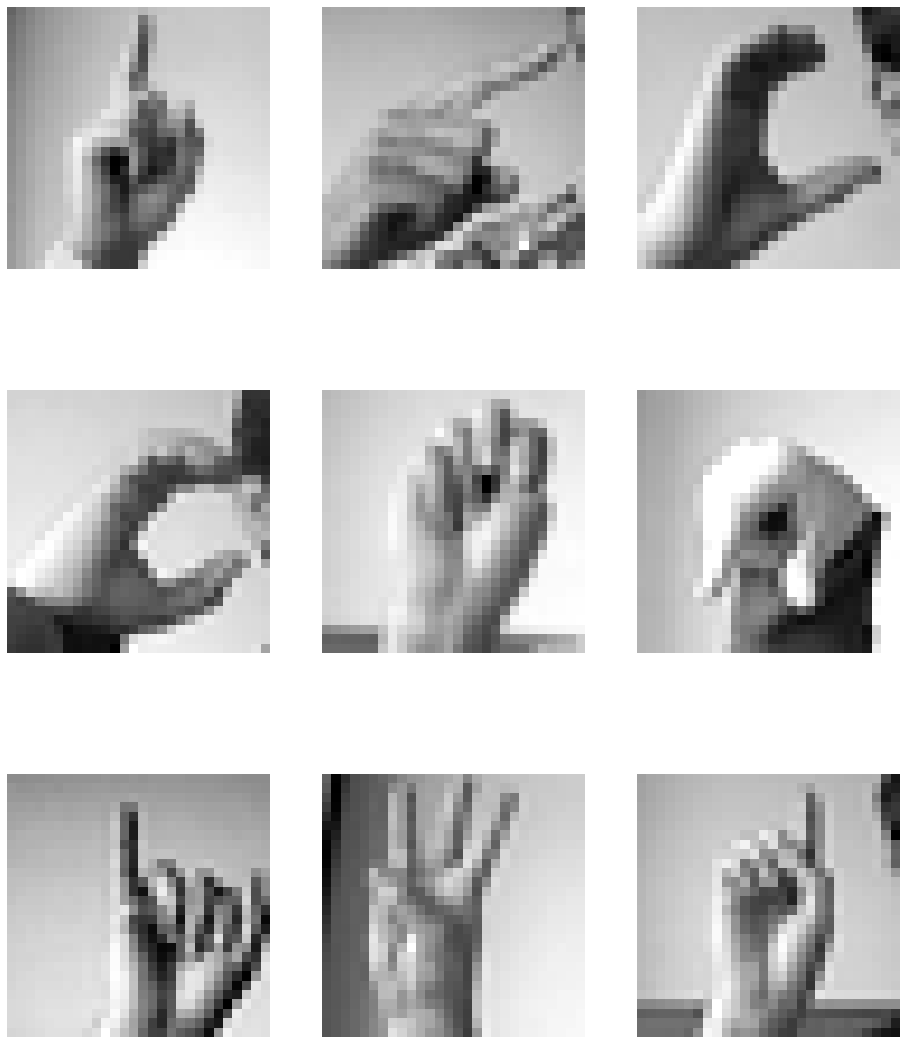

In [15]:
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img,cmap = "gray")
        ax[i,j].axis("off")
        k += 1
plt.show()

## Processing the Images

To reshape the x train into 28*28=784 because we have 784 Pixels

In [16]:
x_train = x_train.values
x_train=np.array([np.reshape(i,(28,28)) for i in x_train])
x_train=np.array([i.flatten() for i in x_train])
x_test = x_test.values
x_train=np.array([np.reshape(i,(28,28)) for i in x_train])
print(x_train.shape)
x_test=np.array([i.flatten() for i in x_test])
print(x_test.shape)

(27455, 28, 28)
(7172, 784)


## Encoding
to change y-train(labels) to zeros and ones to be easier in classification


In [17]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y_train= label_binrizer.fit_transform(y_train)
y_test= label_binrizer.fit_transform(y_test)


In [18]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## Spliting Our Training Data


In [20]:
#spliting training images into the images we will use for training the model and validating the model
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=0)

In [21]:
#showing the shapes of our train, validate, and test images
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(19218, 28, 28)
(19218, 24)
(8237, 28, 28)
(8237, 24)
(7172, 784)
(7172, 24)


## Importing the libraries

In [22]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers import BatchNormalization

In [23]:
#converting the range of the pixel data from 0-255 to 0-1
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [24]:
# reshaping the data to be ready to feed it to the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## Building the model

The Sequential⇒creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

conv layer⇒ consist of set of learnable filters

Batch normalization layer⇒ is a layer that allows every layer of the network to do learning more independently and avoid overfitting of the model.

MaxPooling2D layer⇒ Downsamples the input dimensions by taking the maximum value over an input window for each channel of the input. The window is shifted by strides along each dimension.

Dropout layer⇒ It drop some of the unwanted parameters to help avoid overfitting of the model.

Flatten layer⇒ converting the data into a 1-dimensional array for inputting. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

Relu layer⇒ In this layer we remove every negative value from the filtered image and replace it with zero

Softmax layer⇒ is a generalization of the Logistic Function, and it makes sure that our prediction add up to 1 to Classify.

categorical crossentropy⇒ Used as a loss function for multi-class classification model where there are two or more output labels



In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(24,activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        1

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(19218, 28, 28, 1)
(19218, 24)
(8237, 28, 28, 1)
(8237, 24)


In [28]:
history = model.fit(x_train,y_train,validation_data= (x_val,y_val), batch_size = 128, epochs=20 )

Epoch 1/20
151/151 [==============================] - 6s 19ms/step - loss: 1.8342 - accuracy: 0.4587 - val_loss: 4.2011 - val_accuracy: 0.0390
Epoch 2/20
151/151 [==============================] - 3s 18ms/step - loss: 0.4345 - accuracy: 0.8734 - val_loss: 3.2795 - val_accuracy: 0.2207
Epoch 3/20
151/151 [==============================] - 2s 11ms/step - loss: 0.1528 - accuracy: 0.9603 - val_loss: 0.8251 - val_accuracy: 0.7800
Epoch 4/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0729 - accuracy: 0.9817 - val_loss: 0.0604 - val_accuracy: 0.9937
Epoch 5/20
151/151 [==============================] - 2s 14ms/step - loss: 0.0458 - accuracy: 0.9897 - val_loss: 0.0324 - val_accuracy: 0.9945
Epoch 6/20
151/151 [==============================] - 2s 12ms/step - loss: 0.0324 - accuracy: 0.9915 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0288 - accuracy: 0.9928 - val_loss: 0.0060 - val_accuracy: 0.9988

The model might be complex for this data try to simplify the model

In [29]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(24,activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [31]:
history = model.fit(x_train,y_train,validation_data= (x_val,y_val), batch_size = 128, epochs=20 )

Epoch 1/20
151/151 [==============================] - 2s 11ms/step - loss: 2.3546 - accuracy: 0.2832 - val_loss: 1.0747 - val_accuracy: 0.6454
Epoch 2/20
151/151 [==============================] - 1s 9ms/step - loss: 0.6279 - accuracy: 0.7918 - val_loss: 0.1703 - val_accuracy: 0.9575
Epoch 3/20
151/151 [==============================] - 1s 9ms/step - loss: 0.2179 - accuracy: 0.9283 - val_loss: 0.0524 - val_accuracy: 0.9857
Epoch 4/20
151/151 [==============================] - 1s 9ms/step - loss: 0.1015 - accuracy: 0.9667 - val_loss: 0.0111 - val_accuracy: 0.9989
Epoch 5/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0670 - accuracy: 0.9780 - val_loss: 0.0071 - val_accuracy: 0.9998
Epoch 6/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.0054 - val_accuracy: 0.9999
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0017 - val_accuracy: 1.0000
Epo

Trying anthoer model and chaning some number to see the difference

In [32]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(24,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)       

In [34]:
history = model.fit(x_train,y_train,validation_data= (x_val,y_val), batch_size = 128, epochs=20 )

Epoch 1/20
151/151 [==============================] - 2s 11ms/step - loss: 1.7347 - accuracy: 0.4726 - val_loss: 4.7427 - val_accuracy: 0.0422
Epoch 2/20
151/151 [==============================] - 1s 9ms/step - loss: 0.2631 - accuracy: 0.9135 - val_loss: 5.2277 - val_accuracy: 0.0560
Epoch 3/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0829 - accuracy: 0.9750 - val_loss: 2.3577 - val_accuracy: 0.2984
Epoch 4/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.3881 - val_accuracy: 0.8791
Epoch 5/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0078 - val_accuracy: 0.9999
Epoch 6/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.0142 - val_accuracy: 0.9972
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0072 - val_accuracy: 0.9988
Epo

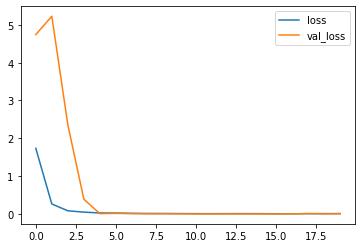

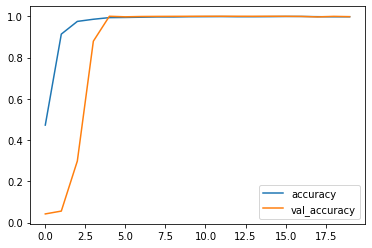

In [35]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();